<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/Inventarios_Coss_Bu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

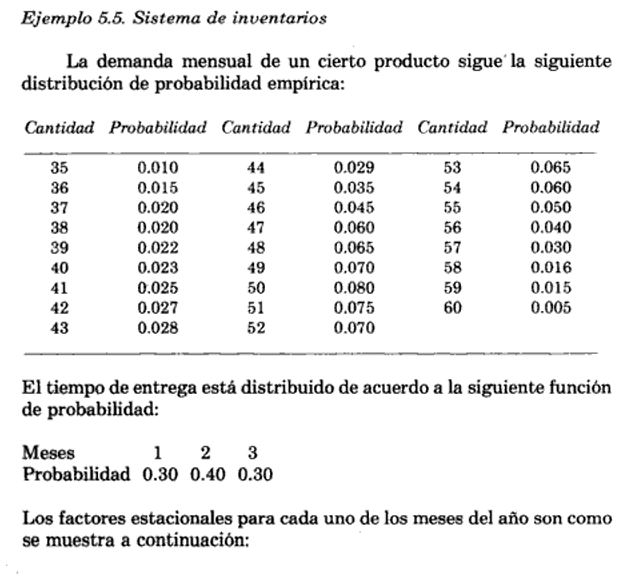

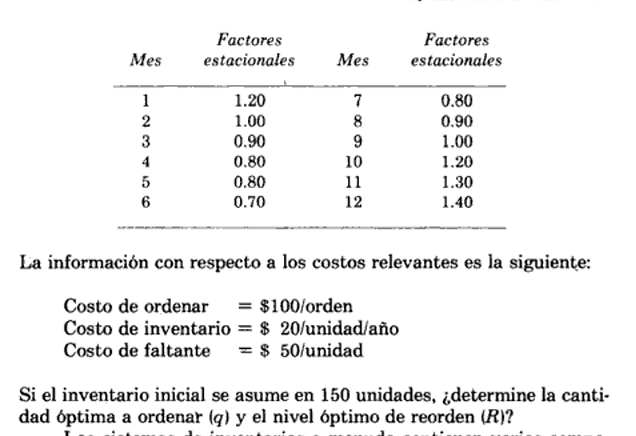

Simulación con visualización gráfica:


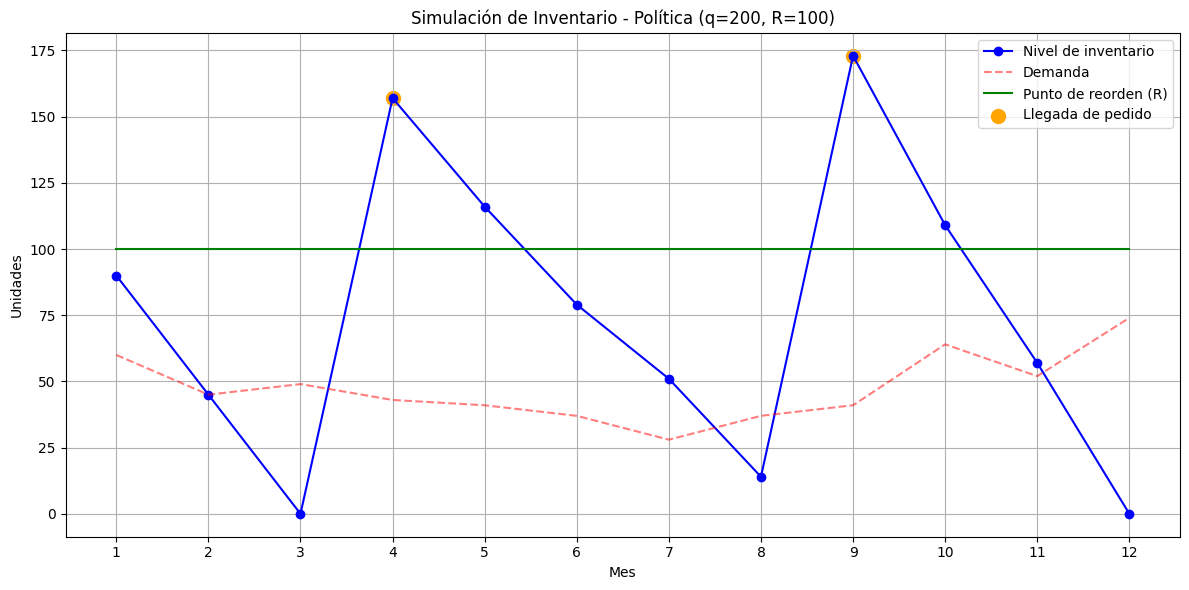

Costo total para q=200, R=100: $2835.00

Buscando parámetros óptimos...

Mejor combinación encontrada:
Cantidad óptima a ordenar (q): 140 unidades
Nivel óptimo de reorden (R): 100 unidades
Costo total anual esperado: $3067.87

Simulación con los parámetros óptimos:


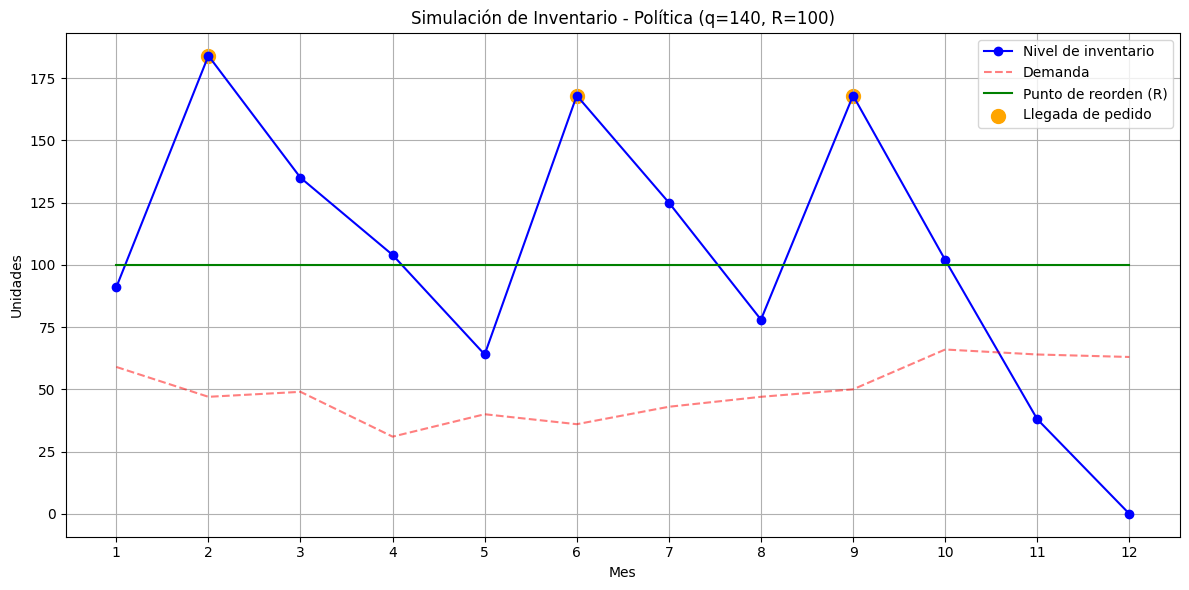

3745.0

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Definición de las tablas de transformada inversa
def obtener_demanda(num_aleatorio):
    if 0.000 <= num_aleatorio < 0.010: return 35
    elif 0.010 <= num_aleatorio < 0.025: return 36
    elif 0.025 <= num_aleatorio < 0.045: return 37
    elif 0.045 <= num_aleatorio < 0.065: return 38
    elif 0.065 <= num_aleatorio < 0.087: return 39
    elif 0.087 <= num_aleatorio < 0.110: return 40
    elif 0.110 <= num_aleatorio < 0.135: return 41
    elif 0.135 <= num_aleatorio < 0.162: return 42
    elif 0.162 <= num_aleatorio < 0.190: return 43
    elif 0.190 <= num_aleatorio < 0.219: return 44
    elif 0.219 <= num_aleatorio < 0.254: return 45
    elif 0.254 <= num_aleatorio < 0.299: return 46
    elif 0.299 <= num_aleatorio < 0.359: return 47
    elif 0.359 <= num_aleatorio < 0.424: return 48
    elif 0.424 <= num_aleatorio < 0.494: return 49
    elif 0.494 <= num_aleatorio < 0.574: return 50
    elif 0.574 <= num_aleatorio < 0.649: return 51
    elif 0.649 <= num_aleatorio < 0.719: return 52
    elif 0.719 <= num_aleatorio < 0.784: return 53
    elif 0.784 <= num_aleatorio < 0.844: return 54
    elif 0.844 <= num_aleatorio < 0.894: return 55
    elif 0.894 <= num_aleatorio < 0.934: return 56
    elif 0.934 <= num_aleatorio < 0.964: return 57
    elif 0.964 <= num_aleatorio < 0.980: return 58
    elif 0.980 <= num_aleatorio < 0.995: return 59
    elif 0.995 <= num_aleatorio <= 1.000: return 60

def obtener_tiempo_entrega(num_aleatorio):
    if 0.00 <= num_aleatorio < 0.30: return 1
    elif 0.30 <= num_aleatorio < 0.70: return 2
    elif 0.70 <= num_aleatorio <= 1.00: return 3

# Factores estacionales por mes
factores_estacionales = {
    1:1.20, 2:1.00, 3:0.90, 4:0.80, 5:0.80, 6:0.70,
    7:0.80, 8:0.90, 9:1.00, 10:1.20, 11:1.30, 12:1.40
}

# Costos
costo_orden = 100
costo_mantenimiento = 20/12
costo_faltante = 50

# Función de simulación para un año
def simular_inventario(q, R, inventario_inicial=150, meses=12):
    inventario = inventario_inicial
    ordenes_pendientes = []  # Lista de pedidos pendientes: (cantidad, mes de llegada)
    costo_total_ordenes = 0
    costo_total_mantenimiento = 0
    costo_total_faltantes = 0

    for mes in range(1, meses + 1):
        # Paso 1: Recibir pedidos que llegan este mes
        for orden in ordenes_pendientes[:]:
            if orden[1] == mes:
                inventario += orden[0]
                ordenes_pendientes.remove(orden)

        # Paso 2: Generar demanda para este mes
        num_aleatorio = random.random()
        demanda_base = obtener_demanda(num_aleatorio)
        demanda = round(demanda_base * factores_estacionales[mes])

        # Paso 3: Satisfacer demanda
        if inventario >= demanda:
            inventario -= demanda
        else:
            faltantes = demanda - inventario
            inventario = 0
            costo_total_faltantes += faltantes * costo_faltante

        # Paso 4: Calcular costo de mantenimiento
        costo_total_mantenimiento += inventario * costo_mantenimiento

        # Paso 5: Hacer pedido si es necesario
        if inventario <= R and not any(orden[1] > mes for orden in ordenes_pendientes):
            num_aleatorio = random.random()
            tiempo_entrega = obtener_tiempo_entrega(num_aleatorio)
            ordenes_pendientes.append((q, mes + tiempo_entrega))
            costo_total_ordenes += costo_orden

    costo_total = costo_total_ordenes + costo_total_mantenimiento + costo_total_faltantes
    return costo_total

# Función de simulación con registro para gráficos
def simular_inventario_con_grafico(q, R, inventario_inicial=150, meses=12):
    inventario = inventario_inicial
    ordenes_pendientes = []
    costo_total_ordenes = 0
    costo_total_mantenimiento = 0
    costo_total_faltantes = 0

    # Listas para almacenar datos para el gráfico
    niveles_inventario = []
    demandas = []
    puntos_reorden = []
    llegadas_pedidos = []
    meses_simulados = []

    for mes in range(1, meses + 1):
        # Registrar datos para el gráfico
        meses_simulados.append(mes)
        puntos_reorden.append(R)

        # Recibir pedidos que llegan este mes
        for orden in ordenes_pendientes[:]:
            if orden[1] == mes:
                inventario += orden[0]
                ordenes_pendientes.remove(orden)
                llegadas_pedidos.append((mes, orden[0]))

        # Generar demanda
        num_aleatorio = random.random()
        demanda_base = obtener_demanda(num_aleatorio)
        demanda = round(demanda_base * factores_estacionales[mes])
        demandas.append(demanda)

        # Satisfacer demanda
        if inventario >= demanda:
            inventario -= demanda
        else:
            faltantes = demanda - inventario
            inventario = 0
            costo_total_faltantes += faltantes * costo_faltante

        # Registrar nivel de inventario después de satisfacer demanda
        niveles_inventario.append(inventario)

        # Calcular costo de mantenimiento
        costo_total_mantenimiento += inventario * costo_mantenimiento

        # Hacer pedido si es necesario
        if inventario <= R and not any(orden[1] > mes for orden in ordenes_pendientes):
            num_aleatorio = random.random()
            tiempo_entrega = obtener_tiempo_entrega(num_aleatorio)
            ordenes_pendientes.append((q, mes + tiempo_entrega))
            costo_total_ordenes += costo_orden

    costo_total = costo_total_ordenes + costo_total_mantenimiento + costo_total_faltantes

    # Generar el gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(meses_simulados, niveles_inventario, 'b-', label='Nivel de inventario', marker='o')
    plt.plot(meses_simulados, demandas, 'r--', label='Demanda', alpha=0.5)
    plt.plot(meses_simulados, puntos_reorden, 'g-', label='Punto de reorden (R)')

    # Marcar llegadas de pedidos
    for mes, cantidad in llegadas_pedidos:
        plt.scatter(mes, niveles_inventario[mes-1], color='orange', s=100, label='Llegada de pedido' if mes == llegadas_pedidos[0][0] else "")

    plt.title(f'Simulación de Inventario - Política (q={q}, R={R})')
    plt.xlabel('Mes')
    plt.ylabel('Unidades')
    plt.xticks(range(1, meses+1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return costo_total

# Función para encontrar parámetros óptimos
def encontrar_parametros_optimos(rango_q, rango_R, num_simulaciones=100):
    mejor_q = 0
    mejor_R = 0
    mejor_costo = float('inf')
    resultados = []

    for q in rango_q:
        for R in rango_R:
            costo_total = 0
            for _ in range(num_simulaciones):
                costo_total += simular_inventario(q, R)
            costo_promedio = costo_total / num_simulaciones
            resultados.append((q, R, costo_promedio))

            if costo_promedio < mejor_costo:
                mejor_costo = costo_promedio
                mejor_q = q
                mejor_R = R

    return mejor_q, mejor_R, mejor_costo, resultados

# Ejecutar una simulación con visualización
print("Simulación con visualización gráfica:")
q_ejemplo = 200
R_ejemplo = 100
costo_ejemplo = simular_inventario_con_grafico(q_ejemplo, R_ejemplo)
print(f"Costo total para q={q_ejemplo}, R={R_ejemplo}: ${costo_ejemplo:.2f}")

# Búsqueda de parámetros óptimos (sin gráficos para mayor velocidad)
print("\nBuscando parámetros óptimos...")
valores_q = range(100, 301, 20)
valores_R = range(40, 101, 10)
mejor_q, mejor_R, mejor_costo, todos_resultados = encontrar_parametros_optimos(valores_q, valores_R)

# Mostrar resultados óptimos
print(f"\nMejor combinación encontrada:")
print(f"Cantidad óptima a ordenar (q): {mejor_q} unidades")
print(f"Nivel óptimo de reorden (R): {mejor_R} unidades")
print(f"Costo total anual esperado: ${mejor_costo:.2f}")

# Mostrar gráfico con los parámetros óptimos
print("\nSimulación con los parámetros óptimos:")
simular_inventario_con_grafico(mejor_q, mejor_R)